# Parte 2

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

acc_list = list()
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])
for i in range(10):
    model.fit(X_train, y_onehot, epochs=1, batch_size=1, verbose=0)
    acc_list.append(model.evaluate(X_train, y_onehot))

150/150 [==============================] - 0s 60us/step


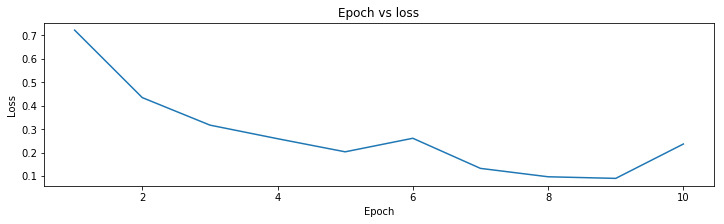

In [26]:
import matplotlib.pyplot as plt

loss_list = list()
step_list = list()
for i in range(len(acc_list)):
    loss_list.append(acc_list[i][0])
    step_list.append(i+1)
    
fig = plt.figure(figsize = (12,3))
plt.plot(step_list, loss_list, '-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs loss')
plt.show()

Para el caso de la red entrenada con keras, bajo la misma configuración, es decir, 2 capas ocultas con 32 y 16 neuronas que se activan con relu y una capa final con 3 salidas activada con softmax. Se puede apreciar que al igual que con la red creada en la parte 1, a medida que se avanza en el entrenamiento se consiguen mejores resultados, siendo capaz de disminuir el valor que se obtiene de la función de perdida.

Ambas redes, la implementada y ésta con keras consiguen ser entrenadas satisfactoriamente para poder producir predicciones a futuro. Aunque existen diferencias que note cuando entrene una y otra, no puedo hablar mucho de estas diferencias ya que no dedique tiempo a ver como estaba implementada la versión de keras, pero si puedo decir algunas cosas que note a simple vista:
* Cuando se entreno la red de la parte 1, se le pasó el batch completo de ejemplos para cada iteración, teniendo un total de 5000 iteraciones, para la red de keras se selecciona un valor de 10 epoch. Con estos valores se consique que ambas redes queden entrenadas de buena forma, si cabe destacar que la red de keras se demoró mucho más que la de la parte 1, esto se puede deber a como está implementado por debajo la red de keras, y que puede diferir en cosas como en la forma en que le son entregados los ejemplos o los calculos matemáticos mismos, que pueden ser quizas más precisos con keras y por eso tarda más.